#**LOADING THE IMDB DATASET**

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


The argument num_words=10000 means we'll inly keep th tpo 10000 most frequently occuring words in the training data. This allows you to work wwith vecotr data of manageable size.

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
test_labels[0]

0

In [7]:
max_value = max(max(sequence) for sequence in train_data)

In [8]:
max_value

9999

#**PREPARING THE DATA**

Now here we have to turn the dataset into tensors. There are two ways to do it:

1. Have same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such tensor integers (the Embedding layer).

2. Other is to One-hot encode the lists to turn them into vectors of 0's and 1's. This would mean, for instance, turning the sequence [3,5] into a 10000 dimensional vector that would except all 0's expect for indices 3 and 5 which would be 1. Then you can use the first layer of your network a Dense layer, capable of handling float-point vector data.

##**ENCODING THE INTEGER SEQUENCE INTO A BINARY MATRIX**

In [9]:
import numpy as np

In [10]:
def vectorize_seq(sequences, dimensions=10000):
  output = np.zeros((len(sequences), dimensions))     # This creates all-zero matrix of shape (len(sequences), dimensions)
  for i, sequence in enumerate(sequences):
    output[i, sequence] = 1                           # Sets specifies indices of output[i] as 1's
  return output

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

Now vectorizing the labels part

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#**BUILDING YOUR NETWORK**

Since, we know that the inputs are vectors and labels are scalars. This is simple we can use a simple stack of fully connected (Dense) layers with "relu" activation.

##**THE MODEL DEFINITION**

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

#**COMPILING THE MODEL**

Here we will use loss function will be "binary_crossentropy" because it is the best choice when dealing with models that output probabilities.

1. Crossentropy : It is a quantity from the field of Information Theory that measures the distance between probability distributions or between ground-truth distributions and our predictions.

In [15]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#**VALIDATING YOUR APPROACH**

##**SETTING ASIDA A VALIDATION SET**

In [16]:
x_valid = x_train[:10000]
partial_x_train = x_train[10000:]

y_valid = y_train[:10000]
partial_y_train = y_train[10000:]

##**TRAINING YOUR MODEL**

Now we will train model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples.

In [17]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_valid, y_valid))

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.5259 - accuracy: 0.7765 - val_loss: 0.4116 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3193 - accuracy: 0.8965 - val_loss: 0.3092 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2376 - accuracy: 0.9217 - val_loss: 0.2929 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1949 - accuracy: 0.9335 - val_loss: 0.2749 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1612 - accuracy: 0.9455 - val_loss: 0.2790 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1378 - accuracy: 0.9538 - val_loss: 0.2865 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.3281 - val_accuracy: 0.8774
Epoch 8/20
30

History object has a member history, which is a dictionary containing data about everything that happened during training.

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##**PLOTTING THE TRAINING AND VALIDATION LOSS**

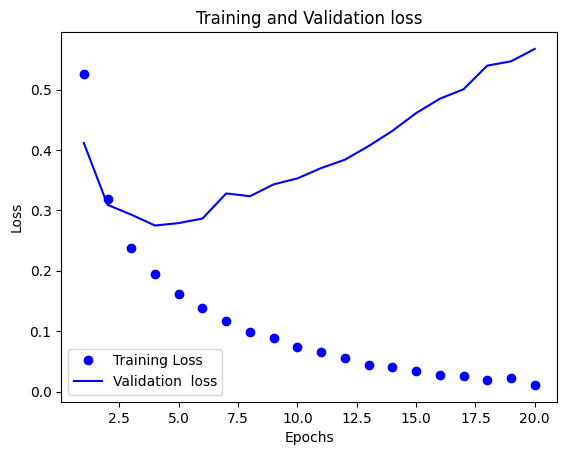

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')     # 'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation  loss')      # 'b' is for 'solid blue line'
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##**PLOTTING THE TRAINING AND VALIDATION ACCURACY**

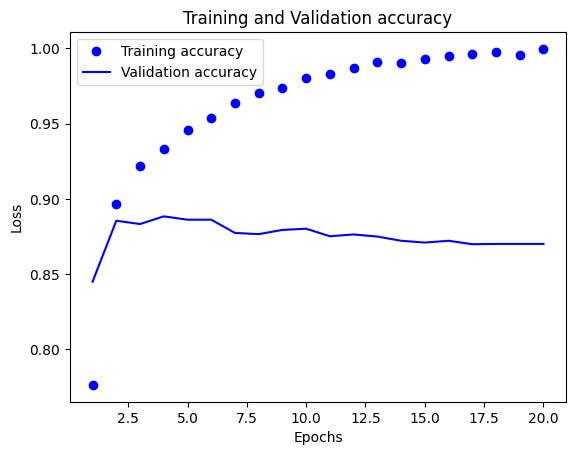

In [20]:
plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As we can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That's what we would expect when running gradient descent optimization - the quantity you're trying to minimize should be less with every iteration.

In precise terms, what we are seeing is overfitting :  after the 2nd epoch, we are overoptimizing on the training data, and we end up learning representatiosn that are specific to the training data and don't generlize to data outside of the training  set.

So we can prevent the overfitting by stopping the training after three epochs.

#**RETRAINING A MODEL FROM START**

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
output = model.evaluate(x_test, y_test)
output

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4605 - accuracy: 0.8082
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2647 - accuracy: 0.9056
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2107 - accuracy: 0.9240
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3133 - accuracy: 0.8747


[0.3133220970630646, 0.8747199773788452]

##**USING A TRAINED NETWORK TO GENERATE PREDICTIONS ON NEW DATA**

In [22]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.12995866],
       [0.9992157 ],
       [0.61830986],
       ...,
       [0.07948912],
       [0.03730809],
       [0.45925388]], dtype=float32)